<a href="https://colab.research.google.com/github/Svarich-11908/machine-learning/blob/main/11_009_Svarich_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ДЗ №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png

1. Прочитайте изображение из файла и выведите его на экран:

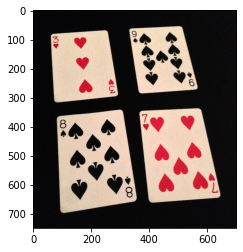

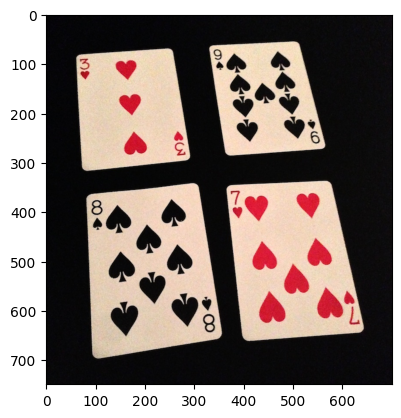

In [10]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

img = imread('http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png')
plt.imshow(img)

2. Выполните последовательно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):


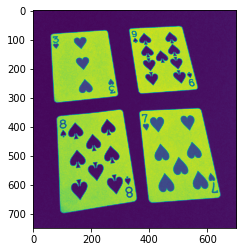

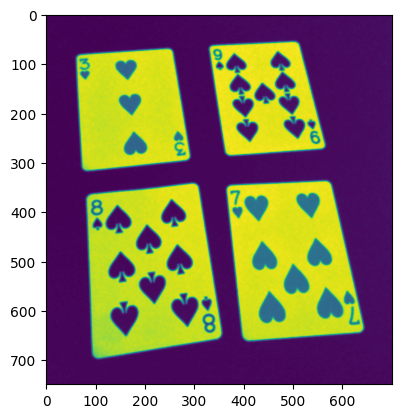

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
plt.imshow(blur)
plt.show()

3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

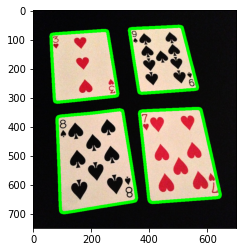

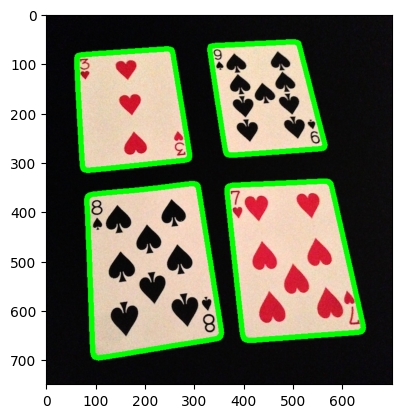

In [16]:
numcards = 4

flag, thresh = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
plt.imshow(contours_img)
plt.show()

4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением:

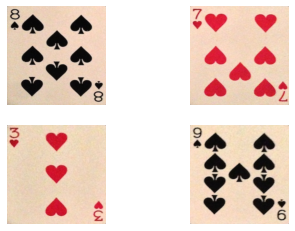

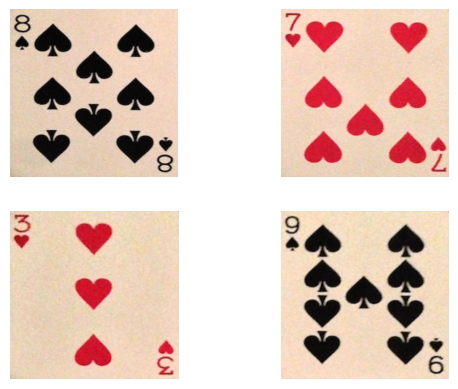

In [19]:
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[450,0],[450,450],[0,450]], np.float32)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    plt.subplot(2,2,i+1); plt.axis('off')
    plt.imshow(warp)

plt.show()

5. Найдите количество символов на одной карте:
- на изображении карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

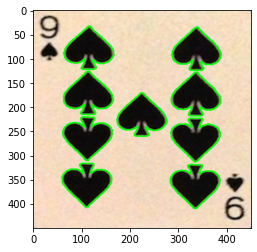

9


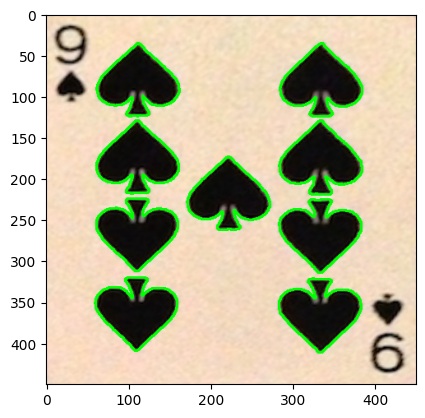

In [20]:
img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
contours_img = warp.copy()

flag, thresh = cv2.threshold(img_gray, 150, 120, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

main_contours = []
main_area = 0
for contour in contours:
  if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
  if main_area == 0:
    main_contours.append(contour)
    main_area = cv2.contourArea(contour)
  else:
    if cv2.contourArea(contour) > 0.9 * main_area :
      main_contours.append(contour)
print(len(main_contours))

cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
plt.imshow(contours_img)
plt.show()

6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

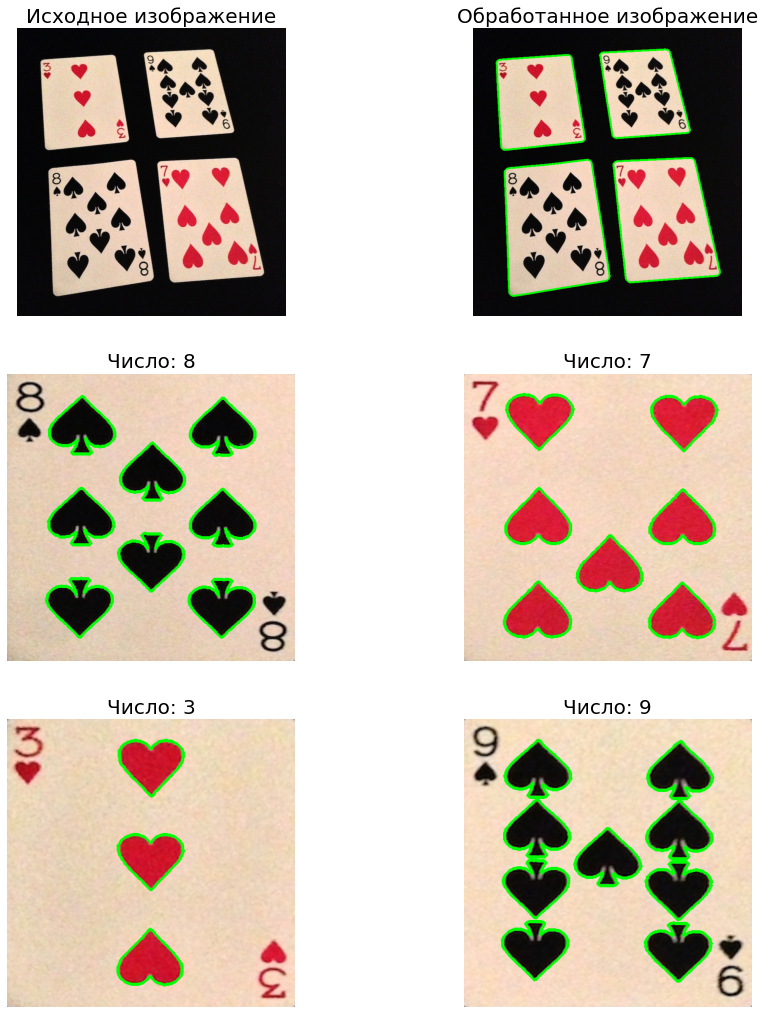

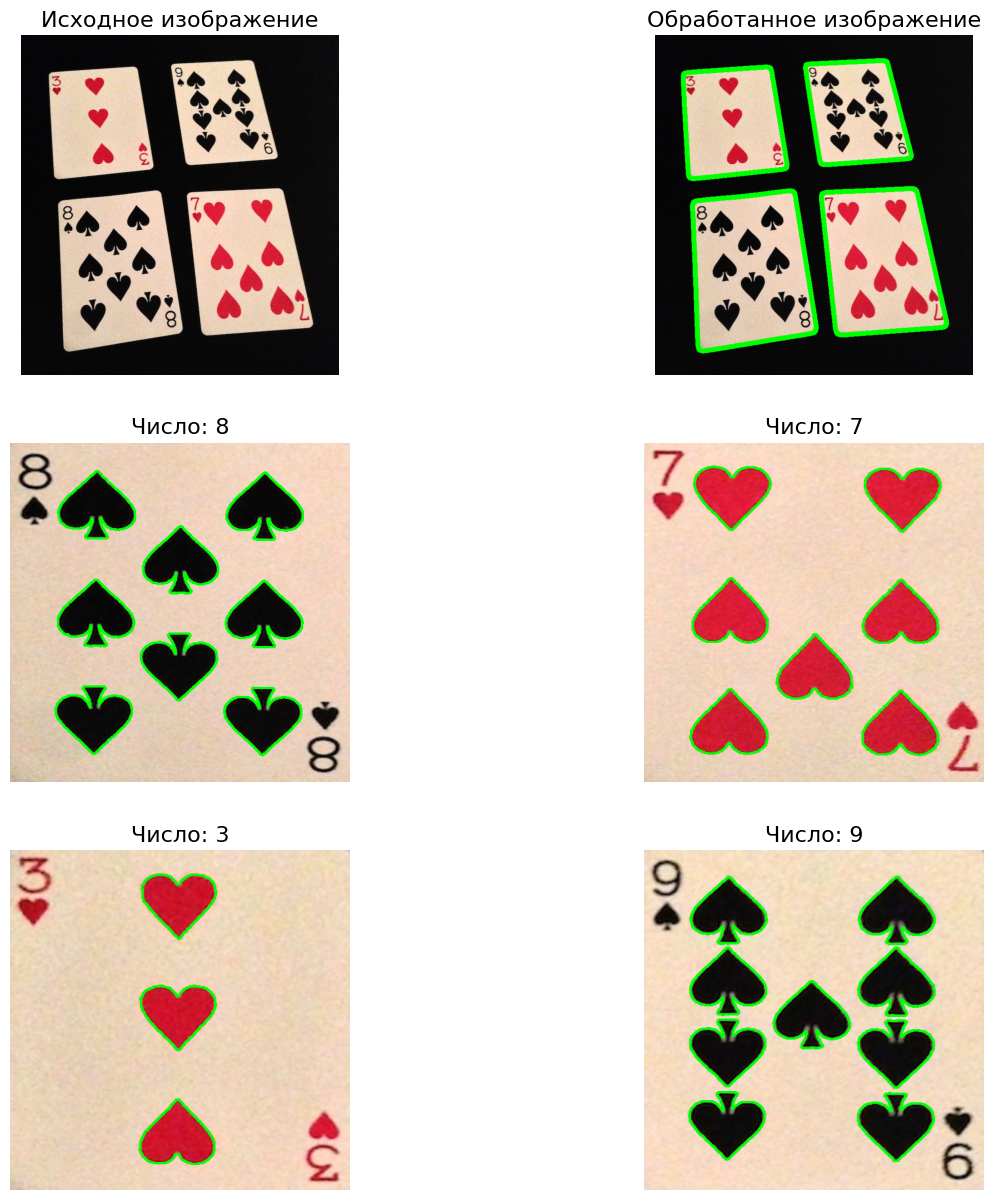

In [24]:
img = imread('http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png')
numcards = 4

flag, thresh = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
fig = plt.figure(figsize=(15, 15))
rows = 3
columns = 2

img_array = []
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[450,0],[450,450],[0,450]], np.float32)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    img_array.append(warp)

plt.subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Исходное изображение", fontsize = 16)
plt.subplot(rows, columns, 2)
plt.imshow(contours_img)
plt.axis('off')
plt.title("Обработанное изображение", fontsize = 16)


for i in range(4):
  img_gray = cv2.cvtColor(img_array[i],cv2.COLOR_RGB2GRAY)
  contours_img = img_array[i].copy()

  flag, thresh = cv2.threshold(img_gray, 150, 120, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  main_contours = []
  main_area = 0
  for contour in contours:
    if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
    if main_area == 0:
      main_contours.append(contour)
      main_area = cv2.contourArea(contour)
    else:
      if cv2.contourArea(contour) > 0.9 * main_area :
        main_contours.append(contour)

  img_array[i] = cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)

  fig.add_subplot(rows, columns, 3+i)

  plt.imshow(img_array[i])
  plt.axis('off')
  plt.title('Число: '+str(len(main_contours)), fontsize = 16) \

plt.show()